In [64]:
from collections import OrderedDict
from copy import deepcopy

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import simuPOP as sp
%matplotlib inline

In [65]:
num_loci = 100
pop_size = 5000
num_gens = 50
divisor = 100.0 / num_loci
frac = divisor / 100.0
frequency = [frac] * num_loci
MAXALLELES = 1000000000

In [66]:
init_ops = OrderedDict()
pre_ops = OrderedDict()
post_ops = OrderedDict()

In [67]:
pops = sp.Population(pop_size, loci=[1] * num_loci)

In [68]:
init_ops['Sex'] = sp.InitSex()
init_ops['Freq'] = sp.InitGenotype(freq=frequency)
post_ops['Stat-freq'] = sp.Stat(alleleFreq=sp.ALL_AVAIL)
post_ops['Stat-freq-eval'] = sp.PyEval(r"'generation:   %d allele freq:  %.2f\n' % (gen, alleleFreq[0][0])")

In [69]:
mating_scheme = sp.RandomMating()

In [70]:
sim = sp.Simulator(pops, rep=1)
sim.evolve(initOps=list(init_ops.values()), preOps=list(pre_ops.values()), postOps=list(post_ops.values()),
           matingScheme=mating_scheme, gen=num_gens)

generation:   0 allele freq:  0.01
generation:   1 allele freq:  0.01
generation:   2 allele freq:  0.01
generation:   3 allele freq:  0.01


generation:   4 allele freq:  0.01
generation:   5 allele freq:  0.01
generation:   6 allele freq:  0.01
generation:   7 allele freq:  0.01
generation:   8 allele freq:  0.01
generation:   9 allele freq:  0.01


generation:   10 allele freq:  0.01
generation:   11 allele freq:  0.01
generation:   12 allele freq:  0.01
generation:   13 allele freq:  0.01


generation:   14 allele freq:  0.01
generation:   15 allele freq:  0.01
generation:   16 allele freq:  0.01
generation:   17 allele freq:  0.01
generation:   18 allele freq:  0.01


generation:   19 allele freq:  0.01
generation:   20 allele freq:  0.01
generation:   21 allele freq:  0.01
generation:   22 allele freq:  0.01
generation:   23 allele freq:  0.01


generation:   24 allele freq:  0.01
generation:   25 allele freq:  0.00
generation:   26 allele freq:  0.00
generation:   27 allele freq:  0.00
generation:   28 allele freq:  0.01
generation:   29 allele freq:  0.01


generation:   30 allele freq:  0.01
generation:   31 allele freq:  0.00
generation:   32 allele freq:  0.01
generation:   33 allele freq:  0.01
generation:   34 allele freq:  0.01


generation:   35 allele freq:  0.01
generation:   36 allele freq:  0.01
generation:   37 allele freq:  0.01
generation:   38 allele freq:  0.01
generation:   39 allele freq:  0.01


generation:   40 allele freq:  0.01
generation:   41 allele freq:  0.01
generation:   42 allele freq:  0.01
generation:   43 allele freq:  0.01
generation:   44 allele freq:  0.01


generation:   45 allele freq:  0.01
generation:   46 allele freq:  0.01
generation:   47 allele freq:  0.01
generation:   48 allele freq:  0.01
generation:   49 allele freq:  0.01


(50,)

In [71]:
def init_acumulators(pop, param):
    acumulators = param
    for acumulator in acumulators:
        pop.vars()[acumulator] = []
    return True

def update_acumulator(pop, param):
    acumulator, var = param
    pop.vars()[acumulator].append(deepcopy(pop.vars()[var]))
    return True

In [72]:
def calc_exp_he(pop):
    #assuming bi-allelic markers coded as 0 and 1
    #sample size not corrected - OK
    pop.dvars().expHe = {}
    for locus, freqs in pop.dvars().alleleFreq.items():
        f0 = freqs[0]
        pop.dvars().expHe[locus] = 1 - f0**2 - (1 - f0)**2
    return True

In [10]:
init_ops['acumulators'] = sp.PyOperator(init_acumulators, param=['num_males', 'exp_he'])
post_ops['Stat-males'] = sp.Stat(numOfMales=True)
post_ops['ExpHe'] = sp.PyOperator(calc_exp_he)
post_ops['male_acumulation'] = sp.PyOperator(update_acumulator, param=('num_males', 'numOfMales'))
post_ops['expHe_acumulation'] = sp.PyOperator(update_acumulator, param=('exp_he', 'expHe'))
#remember ordering
#generation step

In [73]:
del post_ops['Stat-freq-eval']


In [74]:
num_gens = 100
pops_500 = sp.Population(500, loci=[1] * num_loci)
sim = sp.Simulator(pops_500, rep=1)
sim.evolve(initOps=list(init_ops.values()), preOps=list(pre_ops.values()), 
           postOps=list(post_ops.values()),
           matingScheme=mating_scheme, gen=num_gens)

(100,)

In [75]:
pop_500_after = deepcopy(sim.population(0))

In [76]:
pops_40 = sp.Population(40, loci=[1] * num_loci)
sim = sp.Simulator(pops_40, rep=1)
sim.evolve(initOps=list(init_ops.values()),
           preOps=list(pre_ops.values()),
           postOps=list(post_ops.values()),
           matingScheme=mating_scheme, gen=num_gens)

(100,)

In [77]:
pop_40_after = deepcopy(sim.population(0))

In [78]:
def calc_loci_stat(var, fun):
    stat = []
    for gen_data in var:
        stat.append(fun(gen_data.values()))
    return stat

AttributeError: '_dw' object has no attribute 'exp_he'

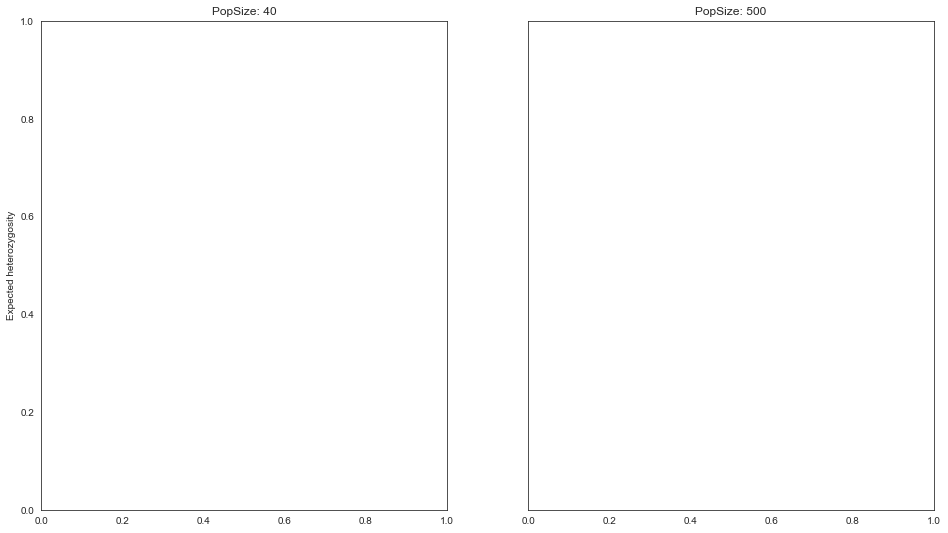

In [81]:
sns.set_style('white')
fig, axs = plt.subplots(1, 2, figsize=(16, 9), sharey=True, squeeze=False)
def plot_pop(ax1, pop):
    for locus in range(num_loci):
        ax1.plot([x[locus] for x in list(pop.dvars().exp_he)], color=(0.75, 0.75, 0.75))
    mean_exp_he = calc_loci_stat(list(pop.dvars().exp_he), np.mean)
    ax1.plot(mean_exp_he, color='r')

axs[0, 0].set_title('PopSize: 40')
axs[0, 1].set_title('PopSize: 500')
axs[0, 0].set_ylabel('Expected heterozygosity')
plot_pop(axs[0, 0], pop_40_after)
plot_pop(axs[0, 1], pop_500_after)
ax = fig.add_subplot(4, 4, 6)
ax.set_title('Distribution of number of males')
ax.boxplot(pop_40_after.dvars().num_males)
ax = fig.add_subplot(4, 4, 16)
ax.set_title('Distribution of number of males')
ax.boxplot(pop_500_after.dvars().num_males)
fig.tight_layout()